# Entropia de Shannon

### Bibliotecas

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib

In [2]:
#Versiones

print("Numpy",np.version.version)
print("Pandas",pd.__version__)
print("Matplotlib",matplotlib.__version__)

Numpy 1.18.1
Pandas 0.22.0
Matplotlib 3.3.0


---

### Funciones

##### Divisor de haz

In [3]:
# Genera una lista aleatoria de ceros y unos, a partir de un criterio de probabilidad. 
# n es la cantidad de valores de la lista.
# porcentaje es el pocentaje de fotones transmitidos, por defecto, es un divisor 50:50.

def dh(n,porcentaje=50):
    
    serie= []

    for i in range(n):
        r=random.random()
        if r>(porcentaje/100):
            serie.append(1)

        else:
            serie.append(0)
    return serie

##### Entropía de Shannon

La entropía de Shannon se define como:

$H=-p_{1} \log _{2}\left(p_{1}\right)-p_{2} \log _{2}\left(p_{2}\right)-\ldots-p_{k} \log _{2}\left(p_{k}\right)=-\sum_{i=1}^{k} p_{i} \log _{2}\left(p_{i}\right)$

https://en.wikipedia.org/wiki/Entropy_(information_theory)

In [4]:
#La función devuelve el valor de la entropía de Shannon para una probabilidad dada. 
#p es la probabilidad de que ocurra un evento.

def shannon(p):
    p0=1-p
    
    if p==1:
        p=1-0.0000000000000001 #Esto evita problemas en el cálculo cuando p1=1 y p0=0
        p0=1-p
        H= - p*math.log(p,2) - p0*math.log(p0,2)
    else:
        H= - p*math.log(p,2) - p0*math.log(p0,2)
    return H

In [5]:
#La función toma dos listas con el mismo número de elementos, entonces, calcula el valor absoluto de la diferencia,
#elemento a elemento de ambas listas. Se devuleve el resultado de promediar los valores absolutos.


def error_promedio(teorico, experimental):

    diff=[x1 - x2 for (x1, x2) in zip(teorico, experimental)] #Calcula la diferencia de las listas
    absolutos = list(map(abs, diff )) #Calcula el valor absoluto de cada elemento
    error_promedio=sum(absolutos)/len(absolutos)
    return error_promedio

---

### Gráfica teórica

In [6]:
# Generamos una lista de valores aleatorios entre 0 y 1. Estos formarán una lista de probabilidades aleatorias. 
# La cantidad de valores debe ser igual a la cantidad de experimentos realizados, para poder calcular
# el error promedio. 

p1s=[]
for i in range (100):
    r=random.random()
    p1s.append(r)
p1s.sort()

In [7]:
#Se produce una lista con las entropias de Shannon calculadas para cada probabilidad.

Hs=[]
for i in range (len(p1s)):
    Hs.append(shannon(p1s[i]))

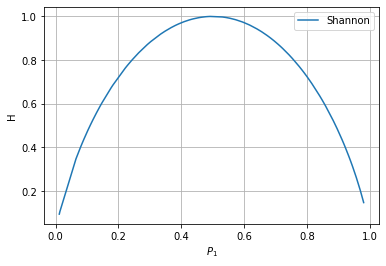

In [8]:
plt.plot(p1s,Hs,label="Shannon", linestyle='-')

plt.xlabel("$P_1$")
plt.ylabel("H")

plt.legend(loc=0)
plt.grid()
plt.savefig("teo_es.png")

plt.show()

### Experimento

In [9]:

#repeticiones del experimento:
experimentos=100

#Número de fotones
fotones=1000

prob=[]
for i in range(experimentos): #Generamos una lista con diferentes probabilidades.

    ran=random.randint(0, 100)
    prob.append(ran)

    
entropias=[]
probabilidades=[]
for i in range(experimentos):

    #Generamos una lista con fotones transmitidos:

    serie1=dh(fotones,prob[i]) # Aplicamos la función del divisor de haz a para cada probabilidad.

    #Calculamos la probabilidad de que un fotón sea transmitido:

    probabilidad=serie1.count(1)/len(serie1)
    probabilidades.append(probabilidad)
    
    #Calculamos la entropía de Shannon para la la probabilidad que obtuvimos.

    entropias.append(shannon(probabilidad))

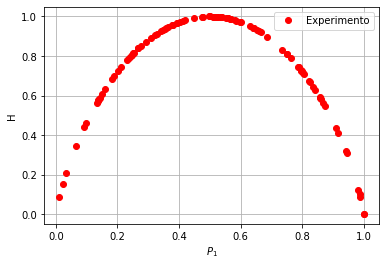

In [10]:
plt.plot(probabilidades,entropias,"ro",label="Experimento")


plt.xlabel("$P_1$")
plt.ylabel("H")

plt.legend(loc=0)
plt.grid()
plt.savefig("exp_es.png")

plt.show()

---

### Comparación de resultados

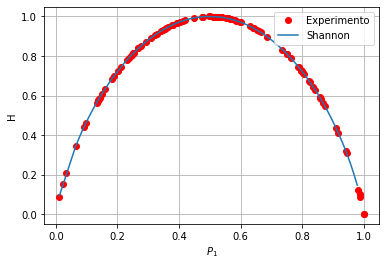

In [11]:
plt.plot(probabilidades,entropias,"ro",label="Experimento")
plt.plot(p1s,Hs,label="Shannon", linestyle='-')


plt.xlabel("$P_1$")
plt.ylabel("H")

plt.legend(loc=1)
plt.grid()
plt.savefig("entropia_shannon.png")

plt.show()

### Estadística

In [12]:
#Error promedio
error_promedio(p1s,probabilidades)

0.33874977764105446

In [13]:
#Desviación estándar
ds=np.std(probabilidades)
ds

0.27348707538017225

In [14]:
#varianza
varianza=np.var(probabilidades)
varianza

0.07479518040000001

In [15]:
#Promedio
promedio=np.mean(probabilidades)

In [16]:
data={"Datos":["Promedio","DS","Varianza","Error promedio"], "Valor":[promedio,varianza,ds,error_promedio(p1s,probabilidades)]}
estadisticos= pd.DataFrame(data) 
estadisticos.to_csv("/home/solaris/Documentos/LFC2/Programas/Programa 4/datos/estadisticos_p2.csv")
estadisticos

,Datos,Valor
0,Promedio,0.514140
1,DS,0.074795
2,Varianza,0.273487
3,Error promedio,0.338750
